In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'datasets/iris.csv'

In [3]:
df = pd.read_csv(filename)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
df['species'] = df['species'].astype('category')

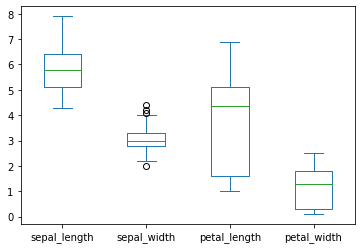

In [11]:
df.plot(kind='box')
plt.show()

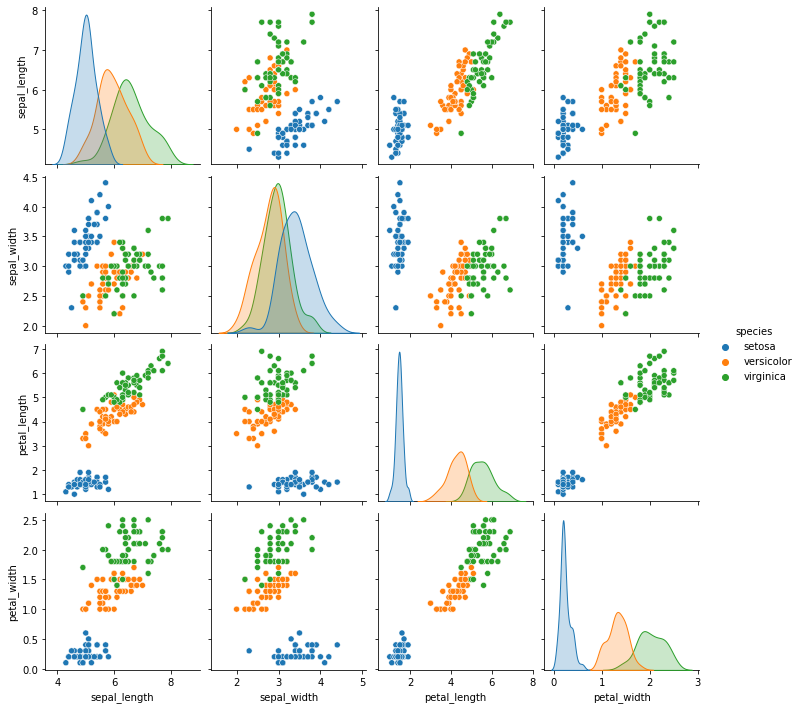

In [12]:
sns.pairplot(data = df, 
             vars = df.columns[:-1], 
             hue = df.columns[-1])
plt.show()

### Split in training data vs test data

In [13]:
from sklearn.model_selection import train_test_split

In [20]:
np.random.seed(1234)

df_train, df_test = train_test_split(df, test_size = 0.3)

print('df_train', df_train.shape)
print('df_test', df_test.shape)

df_train (105, 5)
df_test (45, 5)


### Scaling

In [23]:
feature_names = list(df.columns[:-1])
target_name = df.columns[-1]

print(feature_names)
print(target_name)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species


In [24]:
X_train = np.array(df_train[feature_names])
y_train = np.array(df_train[target_name])

X_test = np.array(df_test[feature_names])
y_test = np.array(df_test[target_name])

### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### k-Nearest Neighbor classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [62]:
correct = y_predicted == y_test
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [63]:
aantal_correct = correct.sum()
aantal_correct

44

In [64]:
accuracy = aantal_correct / len(y_test)
accuracy

0.9777777777777777

### Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model = GaussianNB()

model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [46]:
correct = y_predicted == y_test
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [47]:
aantal_correct = correct.sum()
aantal_correct

43

In [48]:
accuracy = aantal_correct / len(y_test)
accuracy

0.9555555555555556

### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model = DecisionTreeClassifier()

model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [74]:
correct = y_predicted == y_test
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [75]:
aantal_correct = correct.sum()
aantal_correct

43

In [76]:
accuracy = aantal_correct / len(y_test)
accuracy

0.9555555555555556

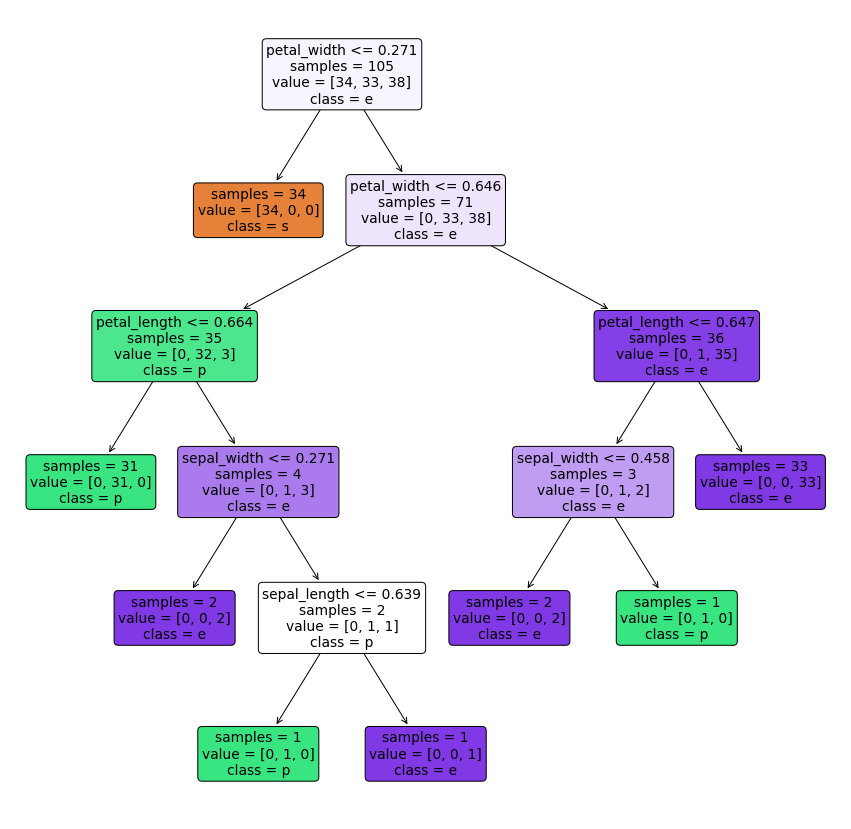

In [77]:
from sklearn import tree

plt.figure(figsize = (15, 15))

tree.plot_tree(model, 
               feature_names = feature_names,
               class_names = target_name,
               filled = True,
               rounded = True, 
               impurity = False)

plt.show()

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [83]:
correct = y_predicted == y_test
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [84]:
aantal_correct = correct.sum()
aantal_correct

43

In [85]:
accuracy = aantal_correct / len(y_test)
accuracy

0.9555555555555556

In [86]:
print('Feature Importances Random Forest', model.feature_importances_)

Feature Importances Random Forest [0.06623159 0.02139591 0.48124371 0.43112879]


### Support Vector Machine

In [87]:
from sklearn.svm import SVC

In [92]:
model = SVC(kernel='rbf')

model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [93]:
correct = y_predicted == y_test
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [94]:
aantal_correct = correct.sum()
aantal_correct

43

In [95]:
accuracy = aantal_correct / len(y_test)
accuracy

0.9555555555555556

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [98]:
correct = y_predicted == y_test
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [99]:
aantal_correct = correct.sum()
aantal_correct

43

In [100]:
accuracy = aantal_correct / len(y_test)
accuracy

0.9555555555555556

### Neural Network

In [101]:
from sklearn.neural_network import MLPClassifier

In [110]:
model = MLPClassifier(solver='lbfgs',
                        activation='relu',     #'logistic',
                        alpha=1e-5,
                        hidden_layer_sizes=(5, 5), 
                        random_state=1,
                        max_iter=1000)

model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [111]:
correct = y_predicted == y_test
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [112]:
aantal_correct = correct.sum()
aantal_correct

43

In [113]:
accuracy = aantal_correct / len(y_test)
accuracy

0.9555555555555556

In [117]:
import sklearn.metrics as sklm
sklm.precision_recall_fscore_support(y_test, y_predicted)

(array([0.94117647, 0.94117647, 1.        ]),
 array([1.        , 0.94117647, 0.91666667]),
 array([0.96969697, 0.94117647, 0.95652174]),
 array([16, 17, 12]))

In [118]:
def print_metrics(labels, scores):
    conf = sklm.confusion_matrix(labels, scores)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Confusion matrix')
    print()
    print('                 Predicted Setosa    Predicted Versicolor     Predicted Virginica')
    print('Actual Setosa       %6d' % conf[0,0] + '               %5d' % conf[0,1] + '                    %5d' % conf[0,2])
    print('Actual Versicolor   %6d' % conf[1,0] + '               %5d' % conf[1,1] + '                    %5d' % conf[1,2])
    print('Actual Virginica    %6d' % conf[2,0] + '               %5d' % conf[2,1] + '                    %5d' % conf[2,2])
    print()
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print()
    print('               Setosa        Versicolor         Virginica')
    print('Num case   %10d' % metrics[3][0] + '        %10d' % metrics[3][1]+ '        %10d' % metrics[3][2])
    print('Precision  %10.2f' % metrics[0][0] + '        %10.2f' % metrics[0][1] + '        %10.2f' % metrics[0][2])
    print('Recall     %10.2f' % metrics[1][0] + '        %10.2f' % metrics[1][1] + '        %10.2f' % metrics[1][2])
    print('F1         %10.2f' % metrics[2][0] + '        %10.2f' % metrics[2][1] + '        %10.2f' % metrics[2][2])

In [119]:
print_metrics(y_test, y_predicted)

Confusion matrix

                 Predicted Setosa    Predicted Versicolor     Predicted Virginica
Actual Setosa           16                   0                        0
Actual Versicolor        1                  16                        0
Actual Virginica         0                   1                       11

Accuracy  0.96

               Setosa        Versicolor         Virginica
Num case           16                17                12
Precision        0.94              0.94              1.00
Recall           1.00              0.94              0.92
F1               0.97              0.94              0.96
